## Build Linear Regression

#### Import libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
class linear_Regresion():
    
    # Initializing the parameters (learning rate and Number of iterations)
    def __init__(self, learning_rate, no_of_iteration):
        self.learning_rate = learning_rate
        self.no_of_iteration = no_of_iteration
    
    def fit(self, X, Y):
        self.m, self.n = X.shape
        
        # Initializing the weight and bias
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        
        # Implementing gradient descent
        for i in range(self.no_of_iteration):
            self.update_weights()
    
    def update_weights(self):
        Y_prediction = self.predict(self.X)
        
        # Calculate gradients
        dw = -( 2* (self.X.T).dot (self.Y - Y_prediction ) ) / self.m
        db = - 2 *np.sum (self.Y - Y_prediction ) / self.m
        
        # updating the weights
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
    
    def predict(self, X):
        return X.dot(self.w) + self.b

## Using Linear Regression model Implement in Dataset

In [3]:
# importing the dependencies
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Data Pre-Processing

In [4]:
# load data using pandas dataframe
salary_data = pd.read_csv('G:\\Data Bases For 99DaysWithCPC\\Building Machine Learning model\\salary_data.csv')

In [5]:
# printing the first 5 columns of the dataframe
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [6]:
# last 5 rows of the dataframe
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [7]:
# number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [8]:
# cgecking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

### Spliting the feature and target

In [9]:
X = salary_data.iloc[:, :-1].values
y = salary_data.iloc[:, 1].values

In [10]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [11]:
print(y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


### Spliting the dataset into training and testing data

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)

### Training the Linear Regression model

In [13]:
model = linear_Regresion(learning_rate=0.001, no_of_iteration=1000)

In [14]:
model.fit(X_train, y_train)

In [15]:
# printing the parameter values (weights and bias)
print('Weights: ', model.w[0])
print('Bias: ', model.b)

Weights:  11610.095331346314
Bias:  8718.57822003503


### Predict the salary value for test data

In [16]:
test_data_prediction = model.predict(X_test)

In [17]:
print(test_data_prediction)

[ 23811.70215079  21489.68308452  60964.00721109  51675.93094602
  91150.25507259  78379.15020811 103921.35993707  43548.86421407
  31938.76888273  87667.22647319]


### Visualizing the predicted values and actual values

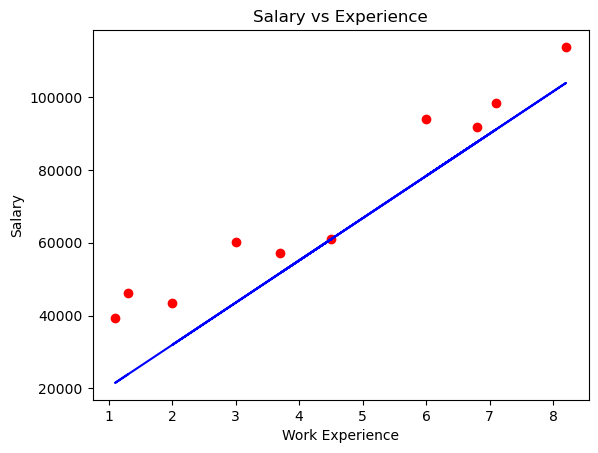

In [18]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()

Weights:  9512.944987627438
Bias:  23707.813246575228
[ 36074.64173049  34172.05273297  66516.0656909   58905.7097008
  91249.72265873  80785.48317234 101713.96214512  52246.64820946
  42733.70322183  88395.83916244]


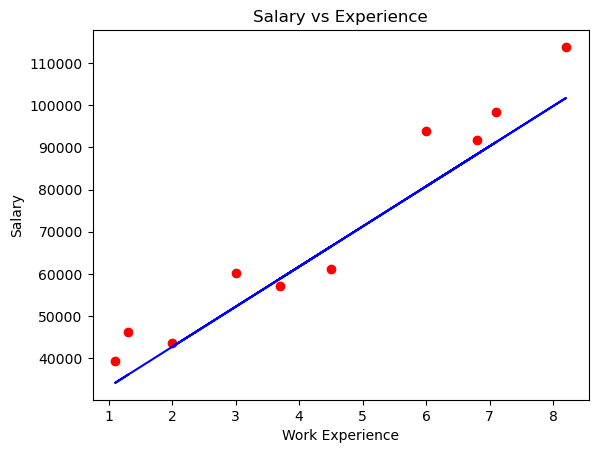

In [25]:
model1 = linear_Regresion(learning_rate=0.02, no_of_iteration=100000)
model1.fit(X_train, y_train)
print('Weights: ', model1.w[0])
print('Bias: ', model1.b)
test_data_prediction = model1.predict(X_test)
print(test_data_prediction)
plt.scatter(X_test, y_test, color='red')
plt.plot(X_test, test_data_prediction, color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Experience')
plt.show()